# Reward normalization comparison

#### Imports


In [1]:
from math import isnan

import numpy as np
from kilroyplot.plot import plt

#### Configuration

In [2]:
window_size = 50

#### Seeding

In [3]:
seed = 123
np.random.seed(seed)

#### Normalization

In [4]:
class WindowScaler:
    def __init__(self, length):
        self._buffer = []
        self._length = length

    def scale(self, value):
        self._buffer.append(value)
        if len(self._buffer) > self._length:
            self._buffer.pop(0)
        mean = np.mean(self._buffer)
        std = np.std(self._buffer)
        if isnan(std) or std < 1e-6:
            return value - mean
        return (value - mean) / std

In [5]:
scaler = WindowScaler(window_size)

#### Experiments

In [6]:
xs = np.arange(1, 100)

In [7]:
values = np.sqrt(xs) * np.sin(np.pi * np.sqrt(xs)) + 20

In [8]:
scaled = [scaler.scale(value) for value in values]

#### Results

In [9]:
def plot_values(xs, values, label, x_label="Step", y_label="Value"):
    plt.plot(xs, values, label=label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()

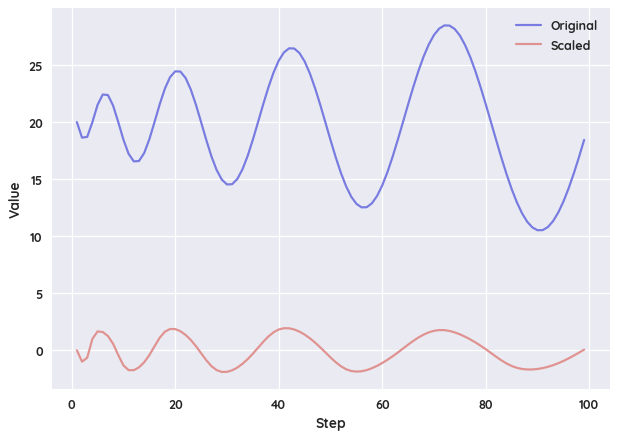

In [10]:
plot_values(xs, values, "Original")
plot_values(xs, scaled, "Scaled")